# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1.  
2.
3. 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# nodups_data = combined_data.drop_duplicates(subset = "Mouse ID")

# display data
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [85]:
# Checking the number of mice.
len(pd.unique(combined_data['Mouse ID']))

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
display_dup_id = dup_id['Mouse ID'].unique()
display_dup_id

array(['g989'], dtype=object)

In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
dup_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.
# clean_data = combined_data.drop_duplicates(subset=['Mouse ID'])
clean_data = combined_data.loc[combined_data['Mouse ID'] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_data['Mouse ID']))


248

## Summary Statistics

In [90]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stats = pd.DataFrame(clean_data)
stats_mean = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
stats_median = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
stats_var = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stats_std = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stats_sem = stats.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": stats_mean,"Median Tumor Volume" : stats_median, 
                                "Tumor Volume Variance" : stats_var,"Tumor Volume Std. Dev." : stats_std,
                                "Tumor Volume Std. Err." : stats_var,})

summary_stats.head()



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,24.947764
Ceftamin,52.591172,51.776157,39.290177,6.268188,39.290177
Infubinol,52.884795,51.820584,43.128684,6.567243,43.128684
Ketapril,55.235638,53.698743,68.553577,8.279709,68.553577
Naftisol,54.331565,52.509285,66.173479,8.134708,66.173479


In [91]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

stats2 = pd.DataFrame(clean_data)
stats2.groupby(stats2["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

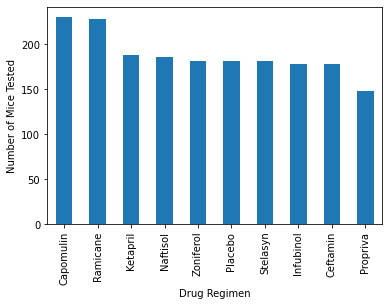

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# configuring the  bar gragh
bar1_data = clean_data["Drug Regimen"].value_counts()

bar1 = bar1_data.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")

plt.show()

# bar1_data.head()

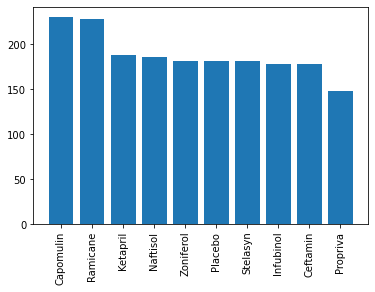

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar2_data = clean_data["Drug Regimen"].value_counts()
bar2_data.head()

plt.bar(bar2_data.index.values, bar2_data.values)
plt.xticks(rotation="vertical");


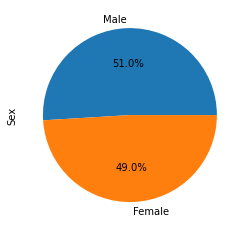

In [94]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

pie_data = clean_data["Sex"].value_counts()
pie_data = pie_data.plot(kind="pie", xlabel="Drug Regimen", ylabel="Sex",autopct="%1.1f%%")


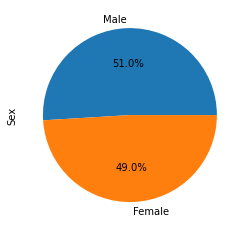

In [98]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

pie2_data = clean_data["Sex"].value_counts()
plt.ylabel("Sex")

plt.pie(pie2_data.values, labels = pie2_data.index.values, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# More information should be provided about this part since it is confusing and difficult.
# Part of this is similar to Day3 but **the suggestions make more sense** if you know you are doing
# this so so you have 4 lists contained inside a list bc this is used to generate the boxplot in the next cell.


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

    
    
    
    
    
# Print results of each drugs outliers - results printed don't need to look pretty.  See below.    
# Note:  in the output below:  '31   36.32346' is series index 31 and value 36.32346.  There is only one outlier.



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


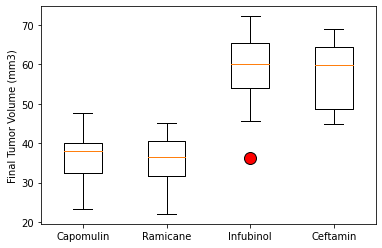

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest





## Line and Scatter Plots

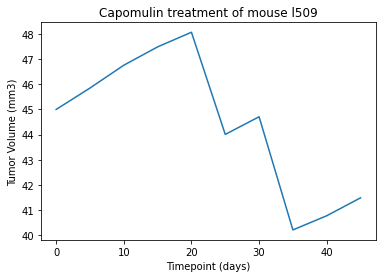

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin









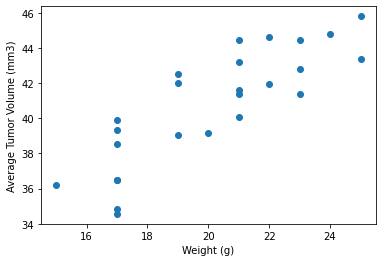

In [17]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"







## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


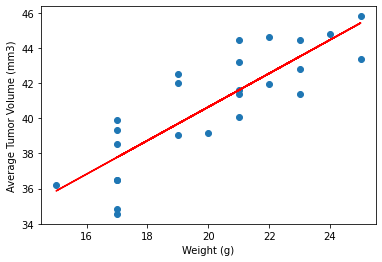

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen










